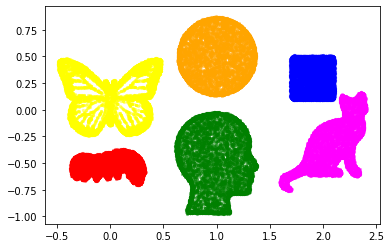

In [17]:
from IPython.display import clear_output
import pdb, time, math, numpy as np, gc, importlib, torch, os, cv2 as cv, ODEModel
import matplotlib.pyplot as plt
from torch import Tensor, nn
from torch.nn import functional as F 
from torch.autograd import Variable
from torch.distributions import MultivariateNormal
from torchdiffeq import odeint_adjoint as odeint 
from geomloss import SamplesLoss
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
import Utils, LearnTraj, LearnVelTraj
importlib.reload(Utils)
from Utils import InputMapping, BoundingBox, ImageDataset, SaveTrajectory, ezshow, SaveTrajectory as st
importlib.reload(ODEModel)
from ODEModel import velocMLP, coordMLP, FfjordModel
importlib.reload(LearnVelTraj);
from LearnTraj import learn_trajectory
from LearnVelTraj import learn_vel_trajectory
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

im1 = ImageDataset('frames/butterfly.jpg'); 
im1b = ImageDataset('frames/butterflyfilled.jpg'); 
im2 = ImageDataset('frames/caterpillar.png', noise_std = .005); 
im3 = ImageDataset('frames/circle.jpeg'); 
im4 = ImageDataset('frames/baldhead.jpeg'); 
im5 = ImageDataset('frames/square.png'); 
im6 = ImageDataset('frames/cat1.png'); 

n_inner = 4000;
n_sil = 10000 - n_inner;
d2 = im2.sample(n_inner, n_sil, scale = [-1, -1], center = [0.05, -.5]); 
d1a = im1.sample(n_inner, n_sil, center = [0, 0]); 
d1b = im1b.sample(n_inner, n_sil, center = [0, 0]); 
d3 = im3.sample(n_inner, n_sil, center = [1, .5]); 
d4 = im4.sample(n_inner, n_sil, center = [1, -.5]); 
d5 = im5.sample(n_inner, n_sil, center = [1.9, .3]); 
d6 = im6.sample(n_inner, n_sil, center = [2, -.3]); 

dat1 = torch.cat((d1a[0], d1b[1]),0)
dat2 = torch.cat(d2,0)
dat3 = torch.cat(d3,0)
dat4 = torch.cat(d4,0)
dat5 = torch.cat(d5,0)
dat6 = torch.cat(d6,0)

ezshow(dat1, col='yellow')
ezshow(dat2, col='red')
ezshow(dat3, col='orange')
ezshow(dat4, col='green')
ezshow(dat5, col='blue')
ezshow(dat6, col='magenta')

In [16]:
outfolder = "results/experiment1/"
model.load_state(outfolder + 'models/state_0050.tar');
SaveTrajectory.save_trajectory(model, keyframes)

<Figure size 432x288 with 0 Axes>

Allocated: 0.01 GB  Reserved: 0.31 GB
0 lr 0.0001
batch 0 loss tensor(2., device='cuda:0', grad_fn=<AddBackward0>)
time elapsed 0.3131272792816162 total time 0.3131282329559326
batch number 0 out of 301
savetime 9.5367431640625e-07
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 n_subsample 378
lr 0.0001
batch 50 loss tensor(0.0139, device='cuda:0', grad_fn=<AddBackward0>)
time elapsed 18.769405126571655 total time 19.082741498947144
batch number 50 out of 301
savetime 1.787602424621582
51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 n_subsample 476
lr 0.0001
batch 100 loss tensor(0.0016, device='cuda:0', grad_fn=<AddBackward0>)
time elapsed 17.432135343551636 total time 38.30270957946777
batch number 100 out of 301
savetime 1.789240837097168
101 102 103 104 105 106 107 108 109 110 111 112 113

NameError: name 'savedir' is not defined

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

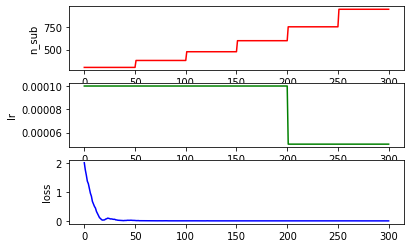

In [7]:
st.gpu_usage()
keyframes, __ = ImageDataset.normalize_samples(torch.stack((dat1, dat6)).to(device));
model = FfjordModel(sigmac = 4, n_freq = 100, hidden_layers=3, hidden_features=512, tdiv = .5, in_features=3, out_features=2).to(device); 
# %prun 
outfolder = "results/experiment1/"
model.load_state(outfoler + 'models/state_0050.tar');
model, losses, separate_losses, lrs, n_subs = learn_vel_trajectory(keyframes, n_iters = 51,n_subsample=300, model=model, outname=outfolder)


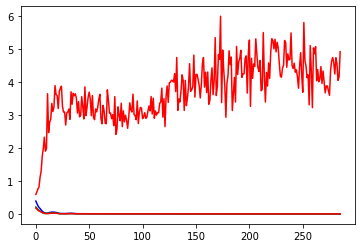

In [6]:
start=15;end=20000;
plt.plot(losses[start:end],'b'); 
plt.plot(separate_losses[0,start:end],'g'); 
plt.plot(separate_losses[1,start:end],'r'); 
# plt.plot(separate_losses[2,start:end]); 
plt.plot(separate_losses[3,start:end],'r'); 
# plt.plot(separate_losses[4,start:end]*10,'b'); 
# plt.plot(separate_losses[5,start:end]); 
# plt.plot(separate_losses[6,start:end]);
plt.savefig(os.path.join('./', f"viz_loss.jpg"),dpi=400); 